In [6]:
! pip install gensim


In [7]:
sentences = [
    ["i", "love", "machine", "learning"],
    ["word2vec", "is", "a", "powerful", "model"],
    ["python", "makes", "nlp", "fun"],
    ["i", "enjoy", "learning", "new", "techniques"]
]


In [8]:
from gensim.models import Word2Vec

# Train model
model = Word2Vec(
    sentences,
    vector_size=100,   # dimensionality of word vectors
    window=5,          # context window size
    min_count=1,       # ignores words with total frequency lower than this
    workers=4,         # parallelization
    sg=0               # 0 = CBOW, 1 = Skip-gram
)

# Save model
model.save("word2vec.model")

# Load model
model = Word2Vec.load("word2vec.model")


In [9]:
# Get the vector for a word
vector = model.wv["machine"]
print(vector.shape)  # (100,)

# Find most similar words
similar_words = model.wv.most_similar("learning", topn=5)
print(similar_words)

# Compute similarity between two words
sim = model.wv.similarity("python", "machine")
print(sim)


(100,)
[('model', 0.21619963645935059), ('is', 0.09311860054731369), ('makes', 0.09291326254606247), ('a', 0.07964024692773819), ('powerful', 0.06285597383975983)]
-0.07691655


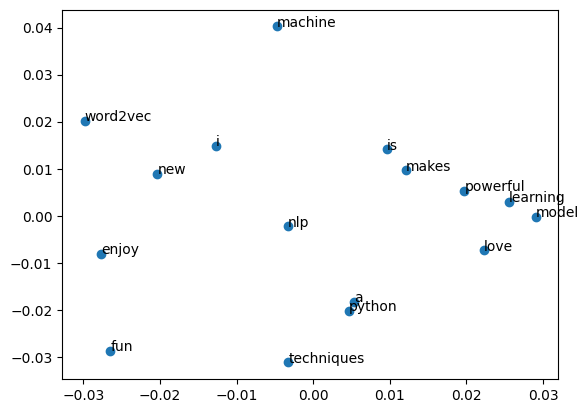

In [10]:
7from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


In [13]:
# Download pretrained GloVe (100d vectors)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d glove.6B

# Load into Gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

glove_input_file = 'glove.6B/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Test
print(model.most_similar('king'))


--2025-09-15 09:39:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-09-15 09:39:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-09-15 09:39:48--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

/tmp/ipython-input-809181956.py:11: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


In [14]:
!pip install glovpy


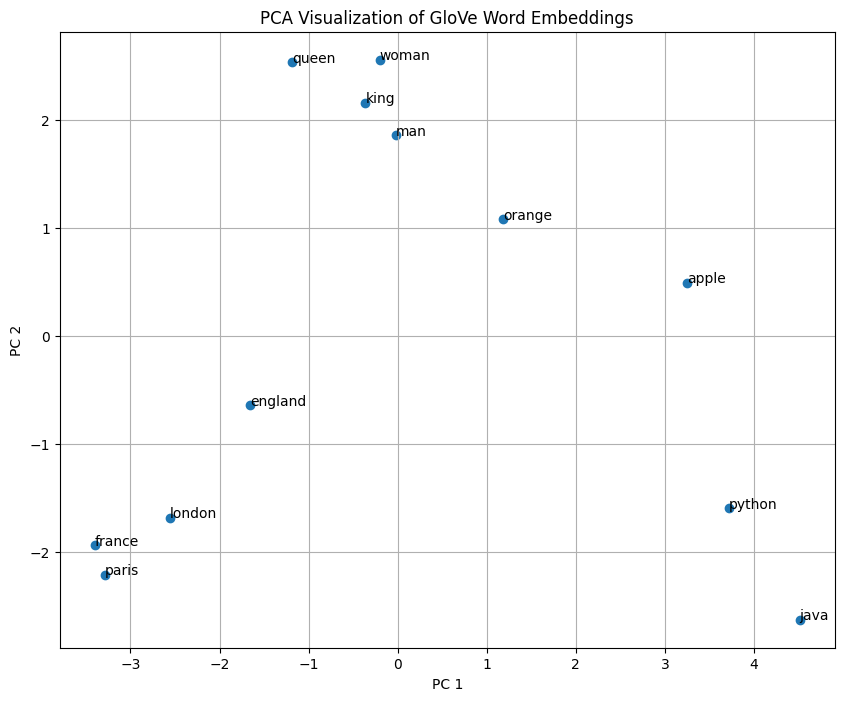

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pick some words to visualize
words = ["king", "queen", "man", "woman", "paris", "france", "london", "england", "apple", "orange", "python", "java"]
word_vectors = [model[word] for word in words]

# Reduce dimensions to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("PCA Visualization of GloVe Word Embeddings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()
